In [50]:
import numpy as np
import pylab as pl
from os.path import join as pjoin
from mvpa2 import cfg

import mvpa2
from os.path import exists, join  
import mvpa2.suite as mv
import glob
import numpy as np
import sys
from mvpa2.suite import *

from mvpa2.measures import rsa

In [28]:
file_loc = '/dartfs-hpc/scratch/psyc164/mvpaces/masks/fusiform_association-test_z_FDR_0.01.nii.gz'
ds = mv.fmri_dataset(file_loc)

In [29]:
ds.shape

(1, 902629)

In [30]:
# get location of voxel with maximum value
np.argmax(ds.samples)

241540

In [41]:
# Starting Actual number 2 for assignemt 2
# set everything up ! 
subid = [1] # ,12,17,27,32,33,34,36,37,41]
subjs = ['{:0>6}'.format(i) for i in subid]
hemis = ['lh', 'rh']
data_path = '/dartfs-hpc/scratch/psyc164/mvpaces/glm/'
mask_path = '/dartfs-hpc/scratch/psyc164/mvpaces/masks/fusiform.nii'
datalad_path = '/dartfs/rc/lab/D/DBIC/DBIC/datasets.datalad.org/labs/haxby/attention/derivatives/'

# change accordingly
tasks = ['beh','tax']
sub, hemi = subjs[0], hemis[0]
prefix = 'sub-rid'+sub
suffix = hemi+'.coefs.gii'


taxonomy = np.repeat(['bird', 'insect', 'primate', 'reptile', 'unduate'],4)
behavior = np.tile(['eating', 'fighting', 'running', 'swimming'],5)
conditions = [' '.join((beh, tax)) for beh, tax in zip(behavior, taxonomy)]

In [17]:
# grab all subj1's  files into a list
#fn = data_path+sub_pref+'*lh.coefs.gii'
fn = data_path+prefix+'*'+suffix
files = sorted(glob.glob(fn))

In [66]:
# load data into pymvpa dataset
n_vertices = 40962
targets = range(1,21)
ds = None
for x in range(len(files)):
    chunks = [x+1]*20
    d = mv.gifti_dataset(files[x], chunks=chunks, targets=conditions)
    d.sa['targets']=conditions
    d.sa['taxonomy'] = taxonomy
    d.sa['behavior'] = behavior
    if ds is None:
        ds = d
    else:      
        ds = mv.vstack((ds,d))
    #ds.fa['node_indices'] = range(n_vertices)
    ds.fa['node_indices'] = range(n_vertices)
#     ds.samples = zscore(ds.samples, axis=1)

In [35]:
# function for plotting RDM once computed
def plot_mtx(mtx, labels, title):
    pl.figure()
    pl.imshow(mtx, interpolation='nearest')
    pl.xticks(range(len(mtx)), labels, rotation=-45)
    pl.yticks(range(len(mtx)), labels)
    pl.title(title)
    pl.clim((0, 2))
    pl.colorbar()

In [36]:
# compute a dataset with the mean samples for all conditions
from mvpa2.mappers.fx import mean_group_sample
mtgs = mean_group_sample(['targets'])
mtds = mtgs(ds)

In [99]:
list_of_nodes = 3

In [159]:
surf = mv.surf.read(join(data_path, '{0}.pial.gii'.format(hemi)))
qe = mv.SurfaceQueryEngine(surf, 5.0, distance_metric='dijkstra')
qe.train(ds)

In [173]:
# same as above, but done in a searchlight fashion
dsm = rsa.PDist(square=False)
sl = Searchlight(dsm, qe, roi_ids=qe.query_byid(123))
slres = sl(mtds)

In [161]:
slres.shape

(190, 40)

In [136]:
ds.fa['new'] = np.zeros(40962)

In [138]:
ds.fa['new'][12345] 

0.0

In [163]:
np_path = '/dartfs-hpc/scratch/psyc164/mvpaces/lab2/results/rsa_sl_isc_lh.npy'
x = np.load(np_path)

In [164]:
x.shape

(40962,)

In [167]:
slres[0].samples

array([[0.47830813, 0.55078818, 0.33718798, 0.55743873, 0.50162801,
        0.53056367, 0.73536724, 0.58933634, 0.53177117, 0.5595763 ,
        0.70018391, 0.46225847, 0.79092784, 0.61236489, 0.77800192,
        0.55762023, 0.34803953, 0.48125089, 0.44613184, 0.28099657,
        0.85055018, 0.80539624, 0.34165026, 0.38175032, 0.24358064,
        0.29578824, 0.83874299, 0.37951366, 0.46084392, 0.35516888,
        0.74185228, 0.41621481, 0.49718243, 0.32907763, 0.48538425,
        0.63825799, 0.33658703, 0.64460787, 0.5796489 , 0.53561756]])

In [168]:
avgd = np.mean(slres, axis=1)

In [169]:
avgd

array([0.52467895, 1.09536493, 0.55328126, 0.48438245, 1.24664133,
       0.63979345, 0.48977674, 0.90719371, 0.52850383, 0.58040907,
       0.54638661, 0.78417773, 0.55204693, 0.71978158, 0.66569092,
       0.86260616, 0.68744726, 0.68757964, 0.45633878, 0.68055857,
       0.41869518, 0.4193974 , 1.00373762, 0.43289519, 0.36820534,
       0.4833251 , 0.64994104, 0.61887942, 0.49075489, 0.54812839,
       0.26063003, 0.62632511, 0.41163253, 1.16144881, 0.69227613,
       0.73916218, 0.38236254, 0.82462358, 0.82472841, 0.79376269,
       0.45016216, 0.7781486 , 0.92722361, 0.72715688, 0.60944299,
       0.61942144, 0.41890461, 0.65976123, 0.38591332, 0.42294116,
       0.96104312, 0.47871174, 0.65202493, 0.65411608, 0.52019846,
       1.34617393, 0.40759749, 0.30563339, 0.70510351, 0.96540715,
       0.73831985, 0.78939341, 0.67877672, 0.59252893, 0.57348897,
       0.59825542, 1.20013945, 0.72352999, 0.78851598, 0.49173574,
       1.25799908, 0.5893709 , 0.29847426, 0.8633797 , 0.52649

TypeError: Invalid dimensions for image data

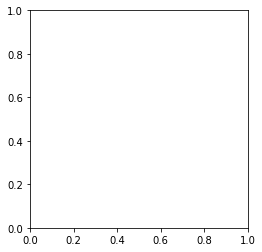

In [171]:
plot_mtx(avgd, conditions, 'fuck')